<a href="https://colab.research.google.com/github/Divyadmenon098/Spotify_music_analysis-ML-/blob/main/Spotify_music_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
df=pd.read_csv("/content/data (3).csv")
df

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


In [ ]:
#import dependencies
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
import seaborn as sns

In [ ]:
df.isna().sum()

Unnamed: 0          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [ ]:
df.dtypes

Unnamed: 0            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
target                int64
song_title           object
artist               object
dtype: object

In [ ]:
df.corr()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
Unnamed: 0,1.000000,0.133055,-0.139615,-0.104185,-0.039880,-0.104641,-0.035611,-0.039962,0.021935,0.060639,-0.135362,-0.027890,-0.053235,-0.077812,-0.865969
acousticness,0.133055,1.000000,-0.179894,0.071536,-0.646319,0.144397,-0.081037,-0.117126,-0.562021,0.068028,-0.099893,-0.127596,-0.190353,-0.152227,-0.129627
danceability,-0.139615,-0.179894,1.000000,0.004695,0.038557,-0.130561,0.022325,-0.132044,0.104362,-0.047867,0.142661,-0.143538,0.128909,0.442061,0.176706
duration_ms,-0.104185,0.071536,0.004695,1.000000,-0.144473,0.305403,0.023570,0.023203,-0.273798,-0.074806,-0.079562,-0.076469,-0.040157,-0.120030,0.146749
energy,-0.039880,-0.646319,0.038557,-0.144473,1.000000,-0.122890,0.072886,0.217435,0.762177,-0.070263,0.093102,0.165721,0.182895,0.278383,0.039688
instrumentalness,-0.104641,0.144397,-0.130561,0.305403,-0.122890,1.000000,-0.009640,0.001063,-0.354625,-0.030099,-0.155349,0.000347,-0.070721,-0.194630,0.152594
key,-0.035611,-0.081037,0.022325,0.023570,0.072886,-0.009640,1.000000,0.049739,0.050929,-0.195040,0.019116,0.040301,0.024937,0.032485,0.033594
liveness,-0.039962,-0.117126,-0.132044,0.023203,0.217435,0.001063,0.049739,1.000000,0.156648,-0.018587,0.092403,0.010558,0.018199,-0.053011,0.026364
loudness,0.021935,-0.562021,0.104362,-0.273798,0.762177,-0.354625,0.050929,0.156648,1.000000,-0.044015,0.088844,0.156418,0.143011,0.204968,-0.072000
mode,0.060639,0.068028,-0.047867,-0.074806,-0.070263,-0.030099,-0.195040,-0.018587,-0.044015,1.000000,-0.049398,-0.059995,-0.039038,-0.032879,-0.072336


In [ ]:
#removing the less correlated attributes
df.drop(columns=["Unnamed: 0","energy","key","liveness","loudness","mode","tempo","time_signature"],axis=1,inplace=True)

In [ ]:
df

,acousticness,danceability,duration_ms,instrumentalness,speechiness,valence,target,song_title,artist
0,0.01020,0.833,204600,0.021900,0.4310,0.286,1,Mask Off,Future
1,0.19900,0.743,326933,0.006110,0.0794,0.588,1,Redbone,Childish Gambino
2,0.03440,0.838,185707,0.000234,0.2890,0.173,1,Xanny Family,Future
3,0.60400,0.494,199413,0.510000,0.0261,0.230,1,Master Of None,Beach House
4,0.18000,0.678,392893,0.512000,0.0694,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.002690,0.3330,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,0.08770,0.894,182182,0.001670,0.1310,0.867,0,Candy,Dillon Francis
2014,0.00857,0.637,207200,0.003990,0.1070,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,0.00164,0.557,185600,0.677000,0.1330,0.623,0,First Contact,Twin Moons


In [ ]:
#convert the strings to numerical values using label encoder
le=LabelEncoder()
df["song_title"]=le.fit_transform(df["song_title"])
df["artist"]=le.fit_transform(df["artist"])
df

,acousticness,danceability,duration_ms,instrumentalness,speechiness,valence,target,song_title,artist
0,0.01020,0.833,204600,0.021900,0.4310,0.286,1,1043,449
1,0.19900,0.743,326933,0.006110,0.0794,0.588,1,1334,222
2,0.03440,0.838,185707,0.000234,0.2890,0.173,1,1906,449
3,0.60400,0.494,199413,0.510000,0.0261,0.230,1,1044,95
4,0.18000,0.678,392893,0.512000,0.0694,0.904,1,1243,628
...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.002690,0.3330,0.211,0,959,662
2013,0.08770,0.894,182182,0.001670,0.1310,0.867,0,281,335
2014,0.00857,0.637,207200,0.003990,0.1070,0.470,0,663,947
2015,0.00164,0.557,185600,0.677000,0.1330,0.623,0,548,1242


In [ ]:
#seperate attributes and class label
X=df.drop(columns=["target"],axis=1)
y=df["target"]


In [ ]:
X

,acousticness,danceability,duration_ms,instrumentalness,speechiness,valence,song_title,artist
0,0.01020,0.833,204600,0.021900,0.4310,0.286,1043,449
1,0.19900,0.743,326933,0.006110,0.0794,0.588,1334,222
2,0.03440,0.838,185707,0.000234,0.2890,0.173,1906,449
3,0.60400,0.494,199413,0.510000,0.0261,0.230,1044,95
4,0.18000,0.678,392893,0.512000,0.0694,0.904,1243,628
...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.002690,0.3330,0.211,959,662
2013,0.08770,0.894,182182,0.001670,0.1310,0.867,281,335
2014,0.00857,0.637,207200,0.003990,0.1070,0.470,663,947
2015,0.00164,0.557,185600,0.677000,0.1330,0.623,548,1242


In [ ]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2012    0
2013    0
2014    0
2015    0
2016    0
Name: target, Length: 2017, dtype: int64

In [ ]:
#using Minmaxscaler to allocate all the values within a certain range
mm=MinMaxScaler()
mm.fit(X)
X_scaled=mm.transform(X)
X_scaled


array([[0.01024843, 0.82482599, 0.19073524, ..., 0.26243209, 0.53350384,
        0.33457526],
       [0.19999772, 0.72041763, 0.3144808 , ..., 0.57793565, 0.68235294,
        0.16542474],
       [0.03457011, 0.83062645, 0.17162409, ..., 0.14437944, 0.97493606,
        0.33457526],
       ...,
       [0.00861024, 0.5974478 , 0.19336526, ..., 0.45465942, 0.33913043,
        0.70566319],
       [0.00164539, 0.50464037, 0.17151585, ..., 0.61450063, 0.28030691,
        0.92548435],
       [0.00282127, 0.37587007, 0.19065432, ..., 0.38361889, 0.40306905,
        0.09836066]])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

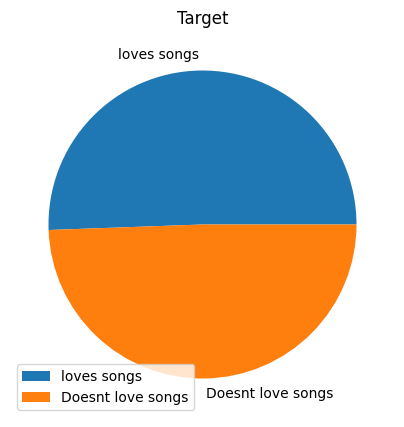

In [ ]:
#graphs showing relations:
import matplotlib.pyplot as plt
y=df['target'].value_counts()
plt.figure(figsize=(5,5))
labels=["loves songs","Doesnt love songs"]
plt.pie(y,labels=labels)
plt.legend(loc='lower left')
plt.title('Target')
plt.show()

<Axes: xlabel='song_title', ylabel='count'>

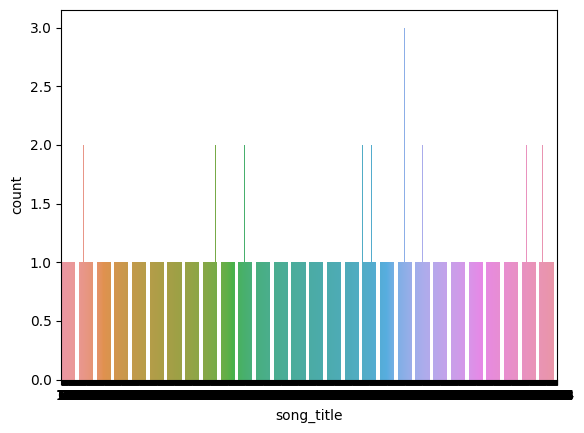

In [ ]:
sns.countplot(x='song_title',data=df)

************************* KNeighborsClassifier() *************************
              precision    recall  f1-score   support

           0       0.60      0.69      0.64       304
           1       0.63      0.53      0.58       302

    accuracy                           0.61       606
   macro avg       0.62      0.61      0.61       606
weighted avg       0.62      0.61      0.61       606

************************* SVC() *************************
              precision    recall  f1-score   support

           0       0.67      0.85      0.74       304
           1       0.79      0.57      0.66       302

    accuracy                           0.71       606
   macro avg       0.73      0.71      0.70       606
weighted avg       0.73      0.71      0.70       606

************************* GaussianNB() *************************
              precision    recall  f1-score   support

           0       0.62      0.79      0.70       304
           1       0.71      0.52      

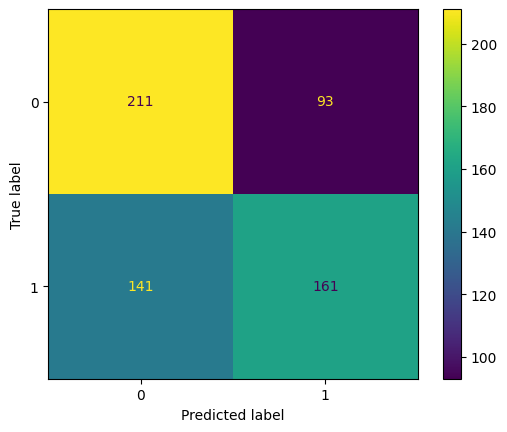

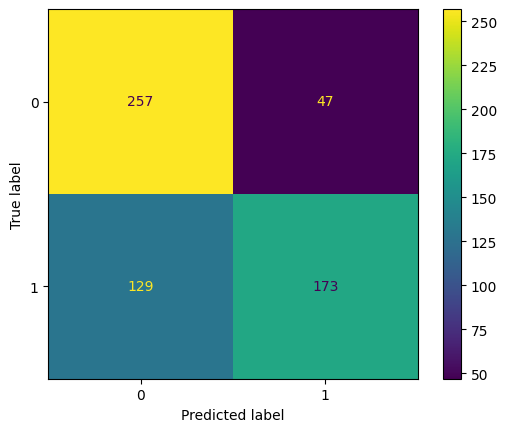

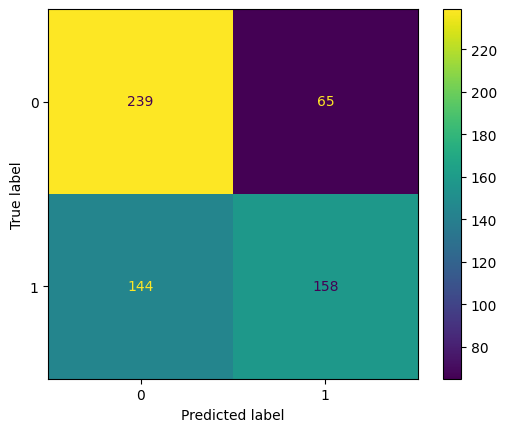

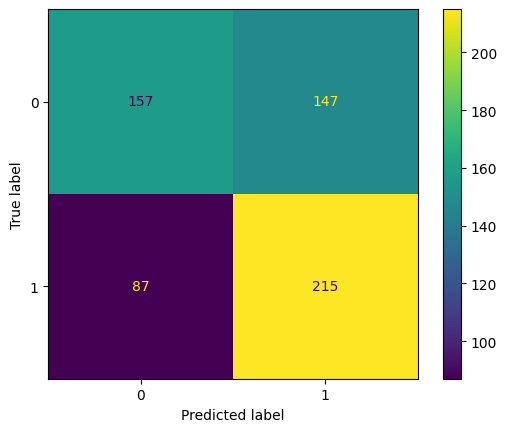

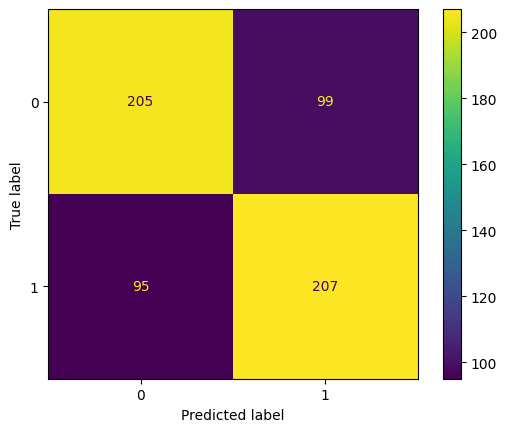

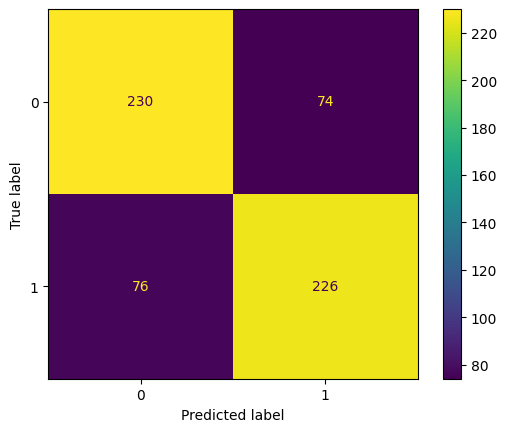

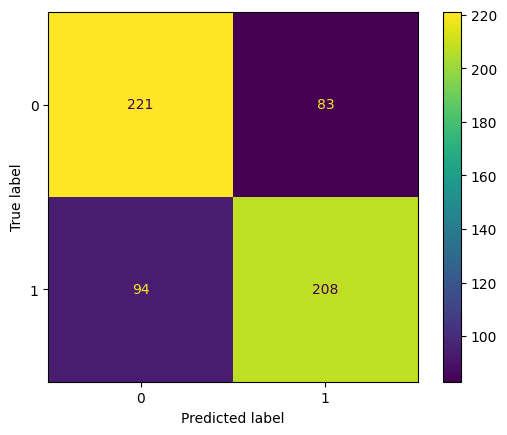

In [ ]:
#applying algorithms
knn=KNeighborsClassifier()
svm=SVC()
gn=GaussianNB()
mn=MultinomialNB()
dc=DecisionTreeClassifier()
rf=RandomForestClassifier()
ab=AdaBoostClassifier()
models=[knn,svm,gn,mn,dc,rf,ab]
for model in models:
  print('*'*25,model,'*'*25)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))



In [ ]:
#as accuracy is very low we try performing oversampling and undersampling
y_train.value_counts()

1    718
0    693
Name: target, dtype: int64

In [ ]:
#oversampling
sm=SMOTE()
X_train_sm,y_train_sm=sm.fit_resample(X_train,y_train)

In [ ]:
y_train_sm.value_counts()

0    718
1    718
Name: target, dtype: int64

************************* KNeighborsClassifier() *************************
              precision    recall  f1-score   support

           0       0.60      0.71      0.65       304
           1       0.64      0.52      0.57       302

    accuracy                           0.61       606
   macro avg       0.62      0.61      0.61       606
weighted avg       0.62      0.61      0.61       606

************************* SVC() *************************
              precision    recall  f1-score   support

           0       0.66      0.85      0.74       304
           1       0.79      0.56      0.65       302

    accuracy                           0.70       606
   macro avg       0.72      0.70      0.70       606
weighted avg       0.72      0.70      0.70       606

************************* GaussianNB() *************************
              precision    recall  f1-score   support

           0       0.62      0.80      0.70       304
           1       0.72      0.51      

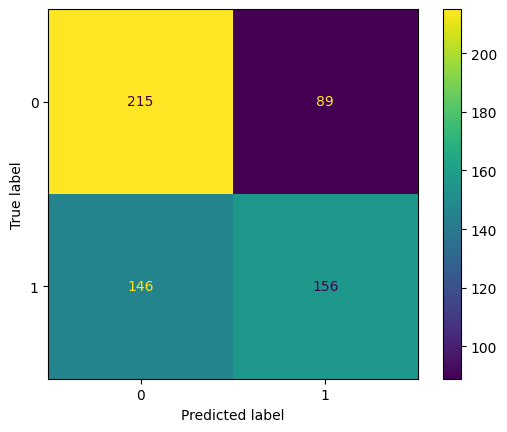

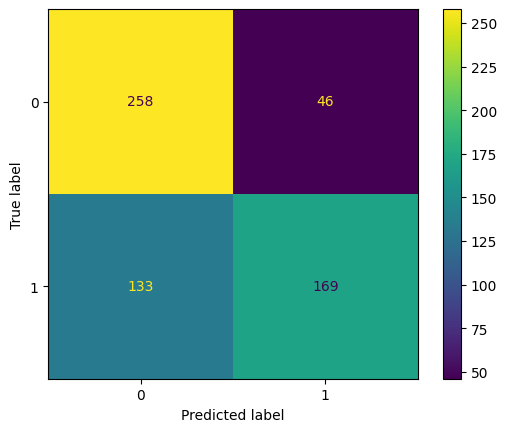

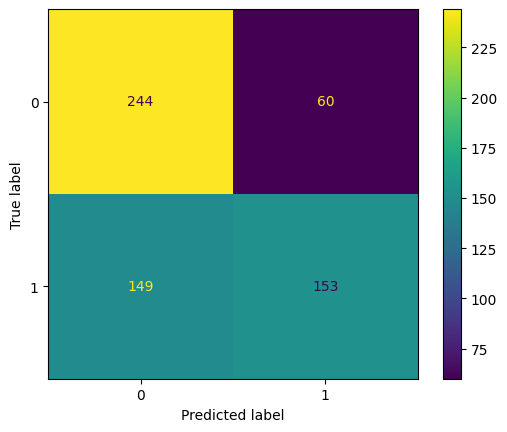

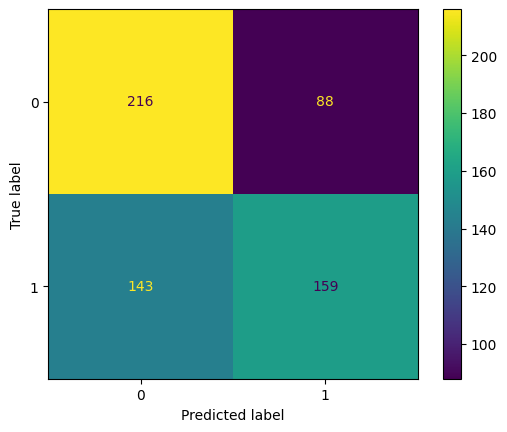

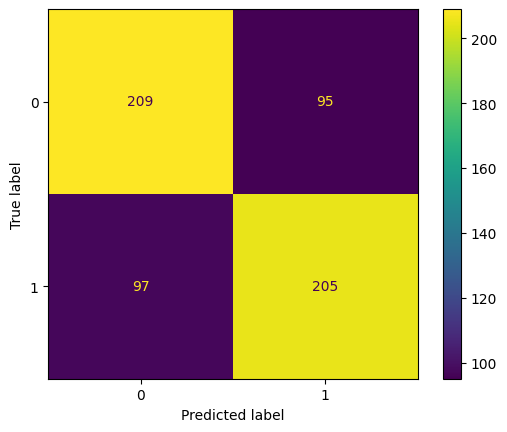

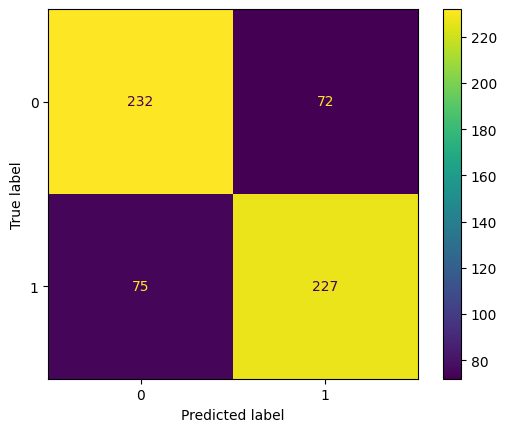

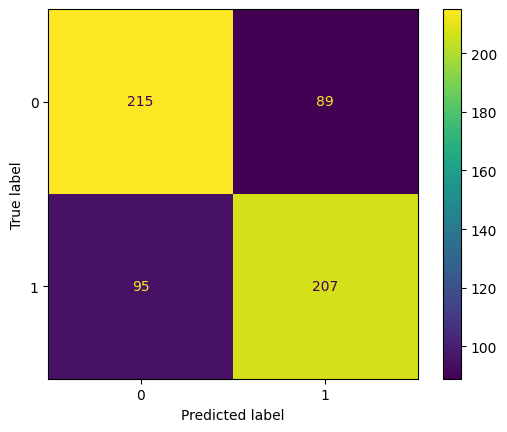

In [ ]:
knsm=KNeighborsClassifier()
svsm=SVC()
nbsm=GaussianNB()
mnsm=MultinomialNB()
dtsm=DecisionTreeClassifier()
rfsm=RandomForestClassifier(random_state=1)
absm=AdaBoostClassifier()
models1=[knsm,svsm,nbsm,mnsm,dtsm,rfsm,absm]
for model in models1:
  print('*'*25,model,'*'*25)
  model.fit(X_train_sm,y_train_sm)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [ ]:
#undersampling
us=RandomUnderSampler(random_state=1)
X_train_us,y_train_us=us.fit_resample(X_train,y_train)

In [ ]:
y_train_us.value_counts()

0    693
1    693
Name: target, dtype: int64

************************* KNeighborsClassifier() *************************
              precision    recall  f1-score   support

           0       0.60      0.72      0.65       304
           1       0.65      0.51      0.57       302

    accuracy                           0.62       606
   macro avg       0.62      0.62      0.61       606
weighted avg       0.62      0.62      0.61       606

************************* SVC() *************************
              precision    recall  f1-score   support

           0       0.65      0.86      0.74       304
           1       0.79      0.55      0.65       302

    accuracy                           0.70       606
   macro avg       0.72      0.70      0.69       606
weighted avg       0.72      0.70      0.69       606

************************* GaussianNB() *************************
              precision    recall  f1-score   support

           0       0.62      0.80      0.70       304
           1       0.72      0.51      

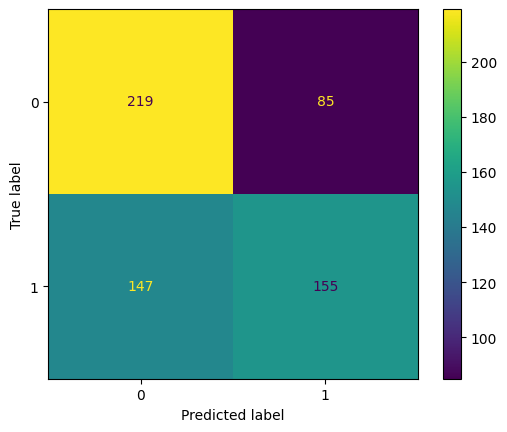

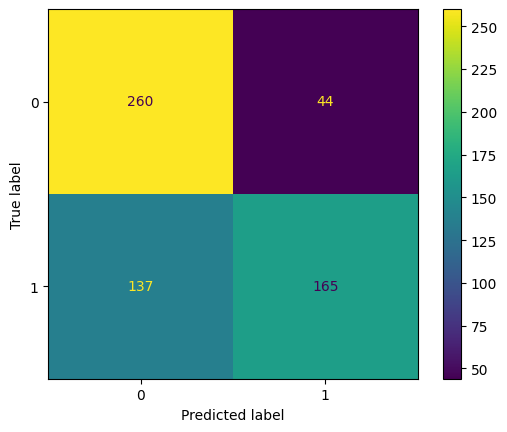

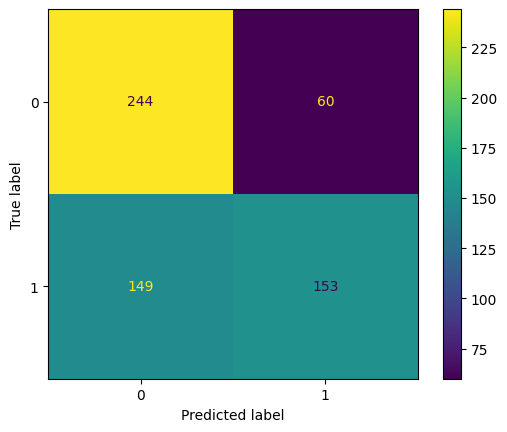

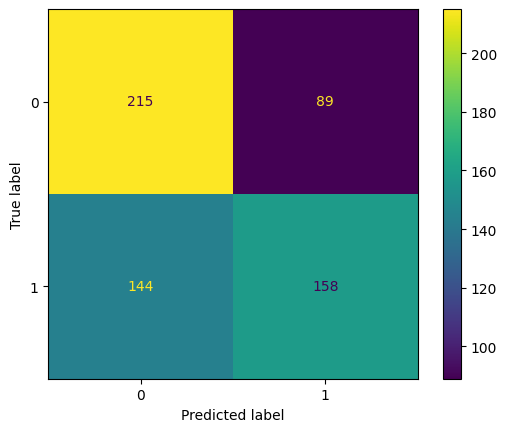

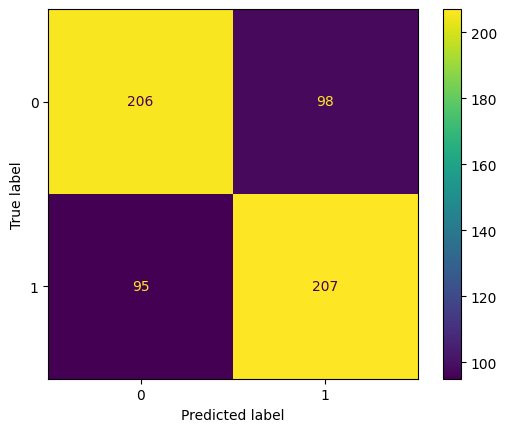

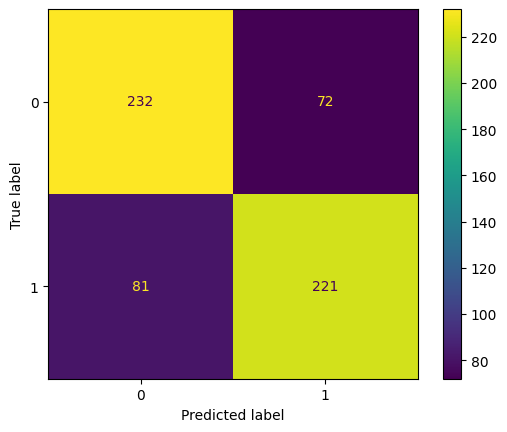

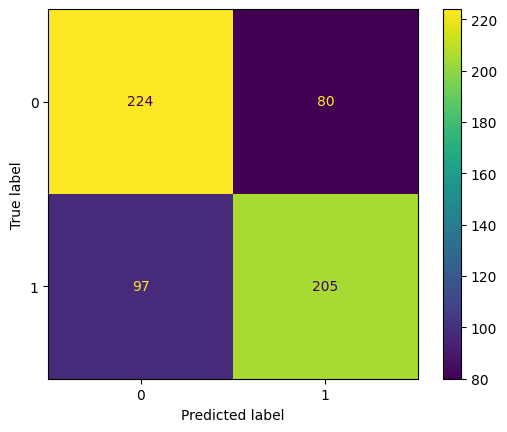

In [ ]:
knus=KNeighborsClassifier()
svus=SVC()
nbus=GaussianNB()
mnus=MultinomialNB()
dtus=DecisionTreeClassifier()
rfus=RandomForestClassifier(random_state=1)
abus=AdaBoostClassifier()
models2=[knus,svus,nbus,mnus,dtus,rfus,abus]
for model in models2:
  print('*'*25,model,'*'*25)
  model.fit(X_train_us,y_train_us)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [ ]:
#PCA
pca=PCA()
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

************************* KNeighborsClassifier() *************************
              precision    recall  f1-score   support

           0       0.60      0.69      0.64       304
           1       0.63      0.53      0.58       302

    accuracy                           0.61       606
   macro avg       0.62      0.61      0.61       606
weighted avg       0.62      0.61      0.61       606

************************* SVC() *************************
              precision    recall  f1-score   support

           0       0.66      0.82      0.73       304
           1       0.76      0.58      0.66       302

    accuracy                           0.70       606
   macro avg       0.71      0.70      0.69       606
weighted avg       0.71      0.70      0.69       606

************************* GaussianNB() *************************
              precision    recall  f1-score   support

           0       0.64      0.82      0.72       304
           1       0.75      0.54      

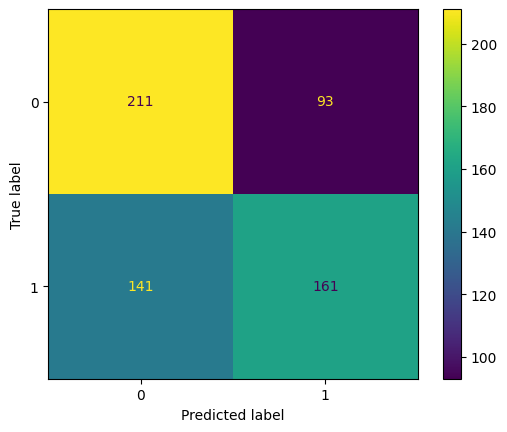

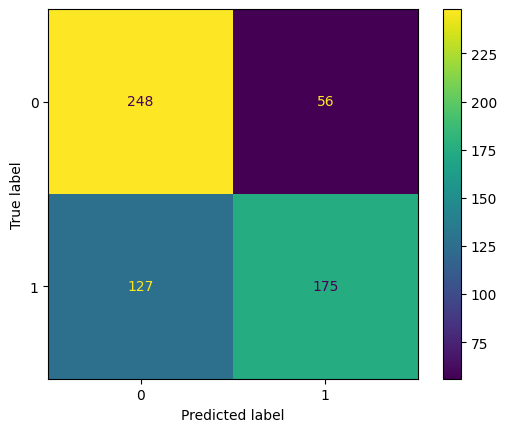

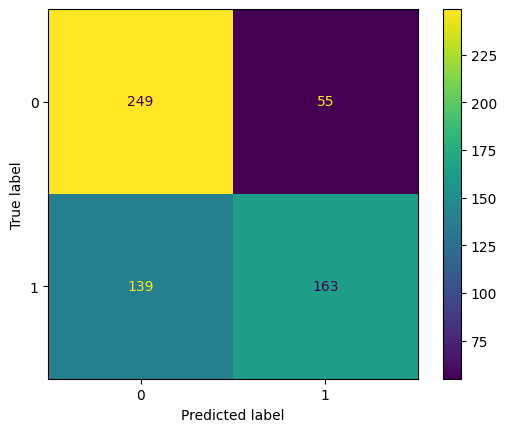

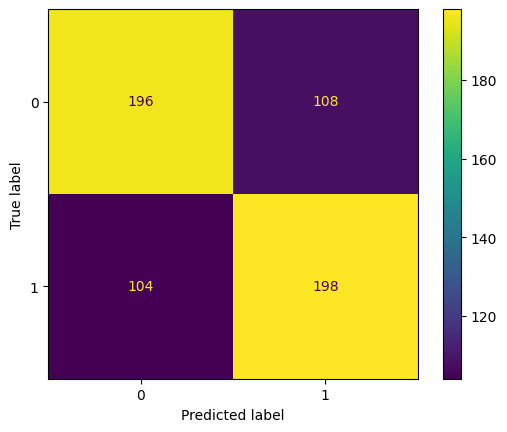

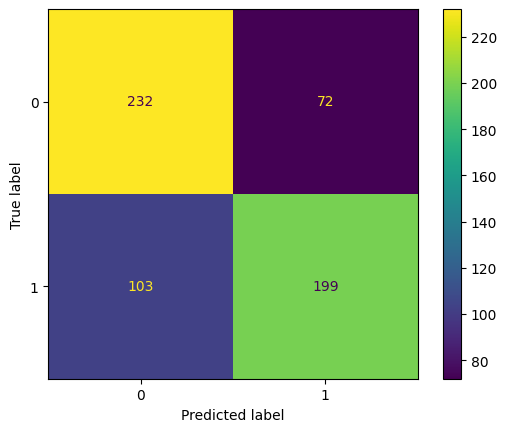

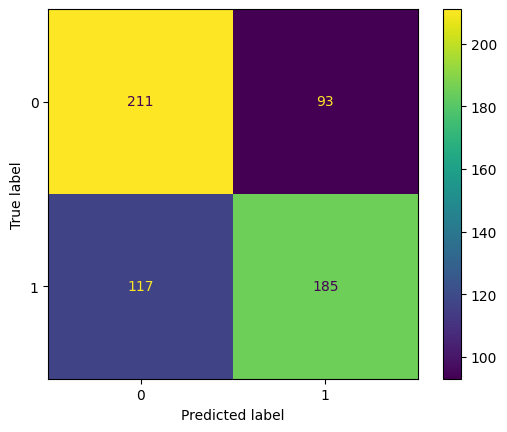

In [ ]:
knpca=KNeighborsClassifier()
svpca=SVC()
nbpca=GaussianNB()
dtpca=DecisionTreeClassifier()
rfpca=RandomForestClassifier(random_state=1)
abpca=AdaBoostClassifier()
models3=[knpca,svpca,nbpca,dtpca,rfpca,abpca]
for model in models3:
  print('*'*25,model,'*'*25)
  model.fit(X_train_pca,y_train)
  y_pred=model.predict(X_test_pca)
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))